# This notebook contains the analysis of the network dynamics on the 2D SAM template and Majority Rule 0
### Typical example of naming the dataframes: df_MR0_50_4wC. This dataframe is the ensemble of trajectories with: 
- Majority Rule 0, hence "MR0"
- n_critical=50% 
- temperature schedule is 4wC, meaning 4 week continuous cold. (alternating cold/warm is represented as 4wCW)
- typical ensemble size is 10 by default (can be changed in the argument of the generating function) 

In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import networkx as nx
import pandas as pd
import collections
import itertools
import seaborn as sns

# files and parameters

In [2]:
T_2d = hfsp.create_tissue("../inputs/2d_sam.csv", True)
g = T_2d

temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])

p_decay0 = 0
p_decay = 0.00003
p_cold = 0.0003
p_warm = 0.03
p_edge = 1

## Data frames for MR0 and n_critical = 50%

In [3]:
df_MR0_50_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')


hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_50_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')


hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_noMR_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                        rule_code_node = [0,1], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_50_NoDecay_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold, p_warm, p_edge, 
                                  rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')



## Data Frames for MR0, 4wC, varying n_critical

In [4]:
hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_10_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.1], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_20_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.2], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_30_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.3], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_40_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.4], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_45_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.45], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_55_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.55], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_60_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.6], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_70_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.7], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_80_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.8], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

## Data Frames for MR0, 4wCW, varying n_critical

In [5]:
hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_10_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.1], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_20_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.2], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_30_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.3], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_40_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.4], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_45_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.45], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_55_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.55], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_60_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.6], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_70_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.7], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

hfsp.update_spontaneous(g, jump_state = "default") # setting the network state to default.
df_MR0_80_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.8], rule_code_edge = None, ensemble_size = 10 , jump_state = 'default')

## Typical code example for generating plots.

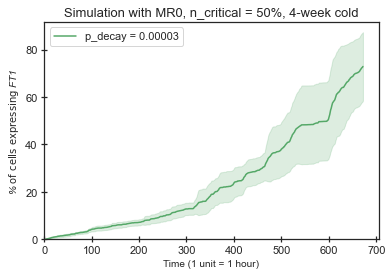

In [6]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0, n_critical = 50%, 4-week cold", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], 'g', label='p_decay = 0.00003')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color='g', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
# fig.savefig("hfsp_with_vs_without_decay_2D.png", dpi = 600)

# Space for experiments

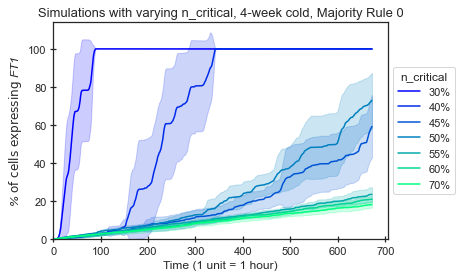

In [17]:
# Simulations with varying n_critical, 4-week cold, Majority Rule 0

cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0,1,7)) #get 10 colors along the full range of hsv colormap

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations with varying n_critical, 4-week cold, Majority Rule 0", font = "Arial", fontsize = 13)


ax.plot(df_MR0_30_4wC['time'], df_MR0_30_4wC['mean'], color = colors[0], label='30%')
ax.fill_between(df_MR0_30_4wC['time'], df_MR0_30_4wC['lower'], df_MR0_30_4wC['upper'], color = colors[0], alpha=0.2)

ax.plot(df_MR0_40_4wC['time'], df_MR0_40_4wC['mean'], color = colors[1], label='40%')
ax.fill_between(df_MR0_40_4wC['time'], df_MR0_40_4wC['lower'], df_MR0_40_4wC['upper'], color= colors[1], alpha=0.2)

ax.plot(df_MR0_45_4wC['time'], df_MR0_45_4wC['mean'], color = colors[2], label='45%')
ax.fill_between(df_MR0_45_4wC['time'], df_MR0_45_4wC['lower'], df_MR0_45_4wC['upper'], color= colors[2], alpha=0.2)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], color = colors[3], label='50%')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color= colors[3], alpha=0.2)

ax.plot(df_MR0_55_4wC['time'], df_MR0_55_4wC['mean'], color = colors[4], label='55%')
ax.fill_between(df_MR0_55_4wC['time'], df_MR0_55_4wC['lower'], df_MR0_55_4wC['upper'], color= colors[4], alpha=0.2)

ax.plot(df_MR0_60_4wC['time'], df_MR0_60_4wC['mean'], color = colors[5], label='60%')
ax.fill_between(df_MR0_60_4wC['time'], df_MR0_60_4wC['lower'], df_MR0_60_4wC['upper'], color=colors[5], alpha=0.2)

ax.plot(df_MR0_70_4wC['time'], df_MR0_70_4wC['mean'], color = colors[6], label='70%')
ax.fill_between(df_MR0_70_4wC['time'], df_MR0_70_4wC['lower'], df_MR0_70_4wC['upper'], color = colors[6], alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(title = "n_critical", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("hfsp_varying_n_critical_MR0_2D_4wC.png", dpi = 600, bbox_inches='tight')

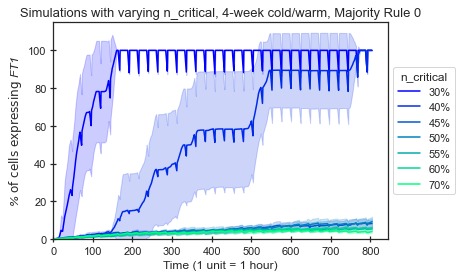

In [15]:
# Simulations with varying n_critical, 4-week cold/warm, Majority Rule 0

cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0,1,7)) #get 10 colors along the full range of hsv colormap

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations with varying n_critical, 4-week cold/warm, Majority Rule 0", font = "Arial", fontsize = 13)


ax.plot(df_MR0_30_4wCW['time'], df_MR0_30_4wCW['mean'], color = colors[0], label='30%')
ax.fill_between(df_MR0_30_4wCW['time'], df_MR0_30_4wCW['lower'], df_MR0_30_4wCW['upper'], color = colors[0], alpha=0.2)

ax.plot(df_MR0_40_4wCW['time'], df_MR0_40_4wCW['mean'], color = colors[1], label='40%')
ax.fill_between(df_MR0_40_4wCW['time'], df_MR0_40_4wCW['lower'], df_MR0_40_4wCW['upper'], color= colors[1], alpha=0.2)

ax.plot(df_MR0_45_4wCW['time'], df_MR0_45_4wCW['mean'], color = colors[2], label='45%')
ax.fill_between(df_MR0_45_4wCW['time'], df_MR0_45_4wCW['lower'], df_MR0_45_4wCW['upper'], color= colors[2], alpha=0.2)

ax.plot(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['mean'], color = colors[3], label='50%')
ax.fill_between(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['lower'], df_MR0_50_4wCW['upper'], color= colors[3], alpha=0.2)

ax.plot(df_MR0_55_4wCW['time'], df_MR0_55_4wCW['mean'], color = colors[4], label='55%')
ax.fill_between(df_MR0_55_4wCW['time'], df_MR0_55_4wCW['lower'], df_MR0_55_4wCW['upper'], color= colors[4], alpha=0.2)

ax.plot(df_MR0_60_4wCW['time'], df_MR0_60_4wCW['mean'], color = colors[5], label='60%')
ax.fill_between(df_MR0_60_4wCW['time'], df_MR0_60_4wCW['lower'], df_MR0_60_4wCW['upper'], color=colors[5], alpha=0.2)

ax.plot(df_MR0_70_4wCW['time'], df_MR0_70_4wCW['mean'], color = colors[6], label='70%')
ax.fill_between(df_MR0_70_4wCW['time'], df_MR0_70_4wCW['lower'], df_MR0_70_4wCW['upper'], color = colors[6], alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(title = "n_critical", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("hfsp_varying_n_critical_MR0_2D_4wCW.png", dpi = 600, bbox_inches='tight')